# Load Datasets and required Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for association
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#for splitting the data
from sklearn.model_selection import train_test_split

#for normalization
from sklearn.preprocessing import MinMaxScaler

#for models
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [68]:
#reading the dataset
dataset = pd.read_csv('train.csv')

# Basic Dataset Statistics

In [69]:
#checking the shape of the dataset
dataset.shape

(54808, 14)

In [70]:
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [71]:
#description of the numerical attributes
dataset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Conclusion from Statistical Numerical Data:
The distribution of data for features no_of_trainings, age, length_of_service, avg_training_score looks normal because it's clear that the mean and the median are close enough

In [72]:
#description of the categorical attributes
dataset.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Conclusion:

Data majority in gender is male with frequency 38496 

Data majority in department is Sales & Marketing with frequency 16840

Data majority in education is Bachelor's with frequency 36669

Data majority in region is region_2 with frequency 12343

Data majority in recruitment_channel is other with frequency 30446

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Checking for Null values

In [8]:
#checking for null values in the dataset
dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Columns 'education' and 'previous_year_rating' have some null values

This needs to be solved

Solution:

Fill the education column using mode()

Fill the prev_year_rating with the median value (= 3)

In [74]:
#filling the null values
dataset['education'].fillna(dataset['education'].mode()[0], inplace = True)
dataset['previous_year_rating'].fillna(3, inplace = True)

#checking for null values again:
dataset.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Checking for Columns with one value only

In [75]:
#check for columns with only one value
one_val = dict()
for col in dataset.columns:
    if len(dataset[col].unique()) == 1:
        one_val.update({col: dataset[col].unique().tolist()})
        
print('The name of column(s) with single value: %s' % one_val)

The name of column(s) with single value: {}


No columns that have one value only, so nothing to be done

# Checking fro duplicate rows

In [76]:
dataset.duplicated().sum()

0

No duplicate rows, so nothing to be done

# dropping the 'employee_id'

In [77]:
dataset = dataset.drop(['employee_id'], axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


# Data Visualization

### Uni-Variate

e:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
e:\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


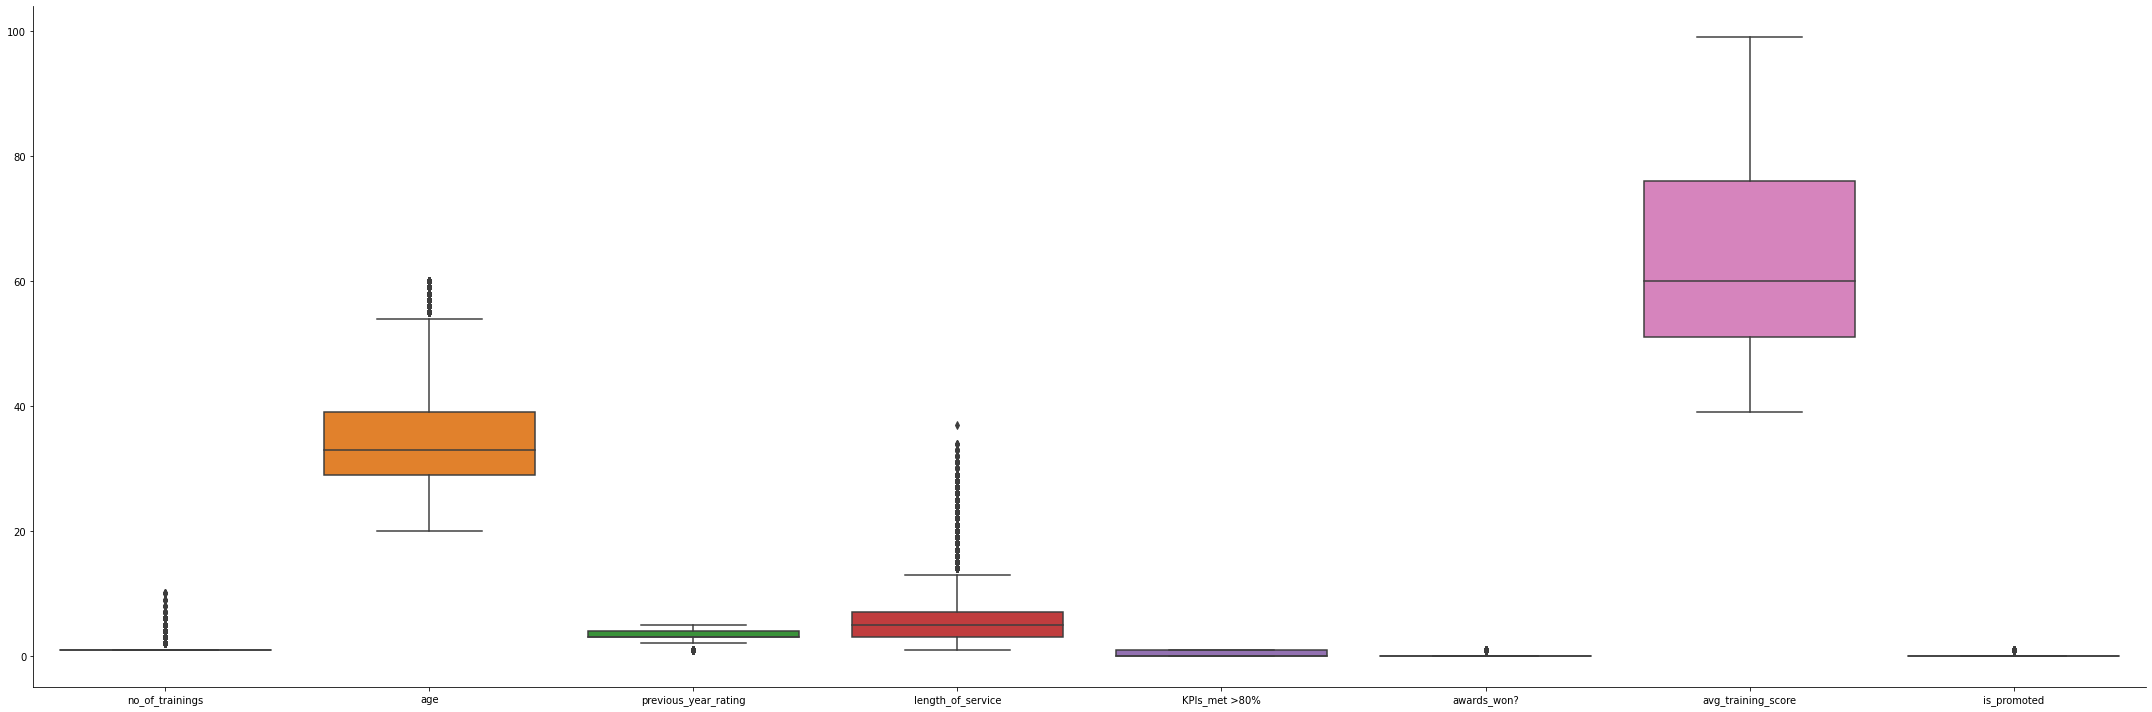

In [78]:
#first we try the boxplot
###################UNSUCCESSFUL TRIAL###########################
sns.factorplot(data=dataset,kind='box',size=10,aspect=3)

Features have pretty different scales, so, plotting a boxplot is not a good idea.

Instead what we can do is plot histograms of various continuously distributed features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002341E353D90>,
      dtype=object)

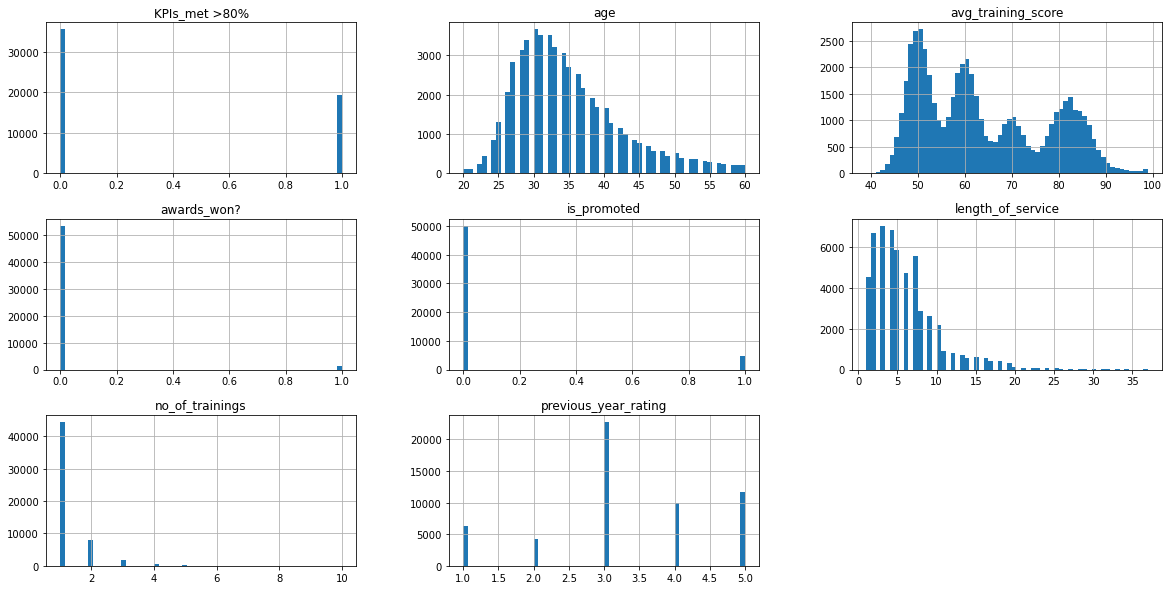

In [79]:
#plotting the histogram distribution of each numerical feature
dataset.hist(bins=60,figsize=(20,10))

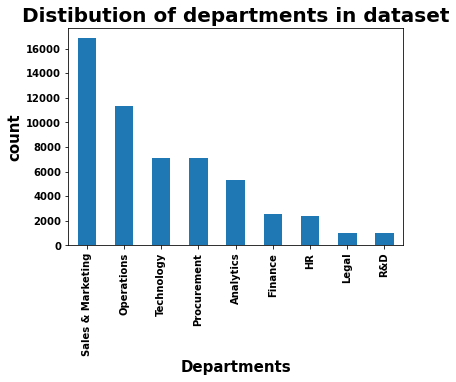

In [80]:
dataset['department'].value_counts().plot(kind='bar')
plt.title('Distibution of departments in dataset',fontweight='bold',fontsize = 20)
plt.xlabel('Departments',fontweight='bold',fontsize = 15)
plt.ylabel('count',fontweight='bold',fontsize = 15)
plt.xticks(fontweight="bold",fontsize = 10)
plt.yticks(fontweight="bold",fontsize = 10)
plt.show()


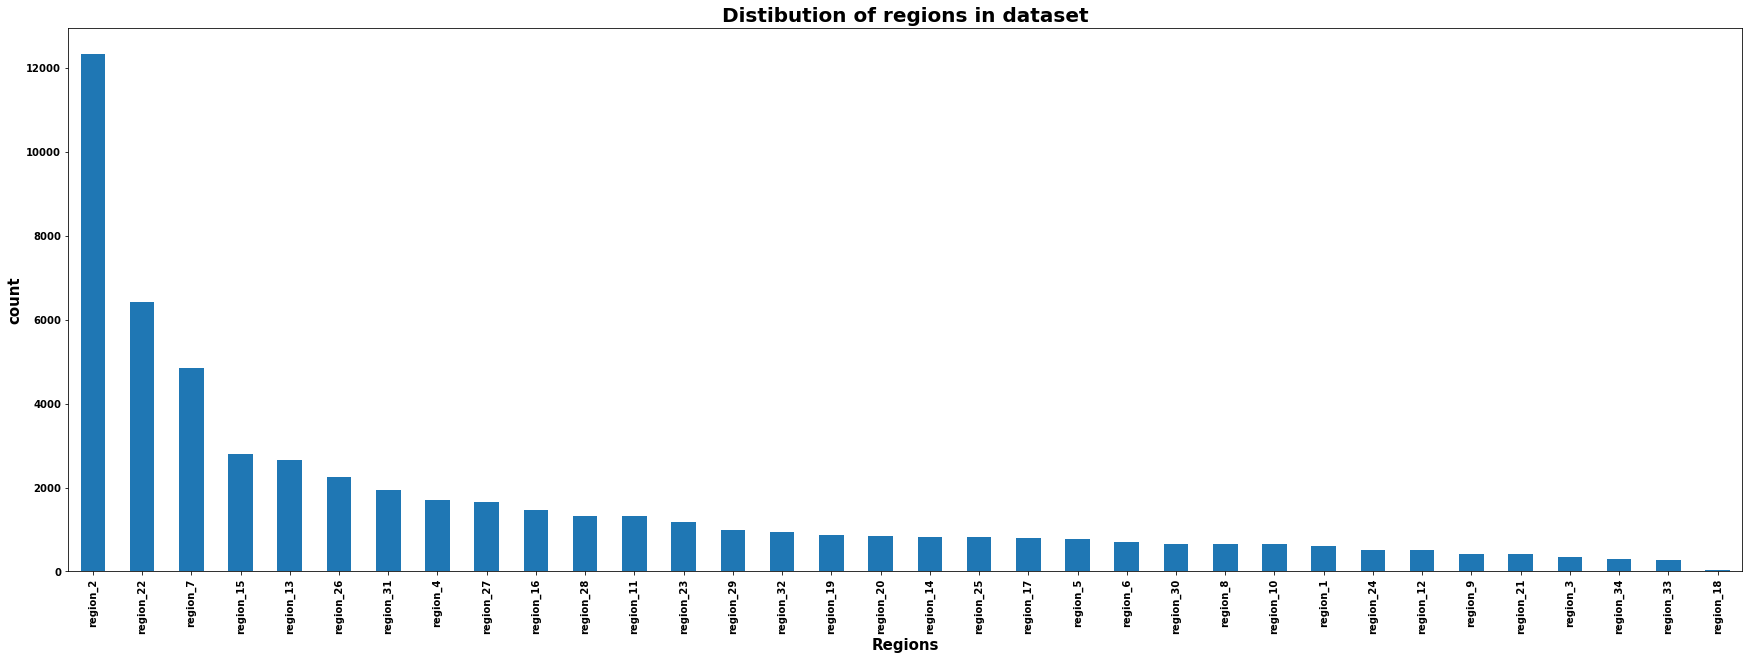

In [81]:
plt.figure(figsize=(30,10))
dataset['region'].value_counts().plot(kind='bar')
plt.title('Distibution of regions in dataset',fontweight='bold',fontsize = 20)
plt.xlabel('Regions',fontweight='bold',fontsize = 15)
plt.ylabel('count',fontweight='bold',fontsize = 15)
plt.xticks(fontweight="bold",fontsize = 10)
plt.yticks(fontweight="bold",fontsize = 10)
plt.show()

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


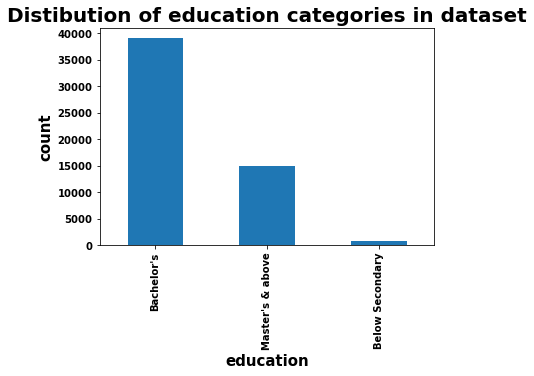

In [83]:
dataset['education'].value_counts().plot(kind='bar')
plt.title('Distibution of education categories in dataset',fontweight='bold',fontsize = 20)
plt.xlabel('education',fontweight='bold',fontsize = 15)
plt.ylabel('count',fontweight='bold',fontsize = 15)
plt.xticks(fontweight="bold",fontsize = 10)
plt.yticks(fontweight="bold",fontsize = 10)
plt.show()

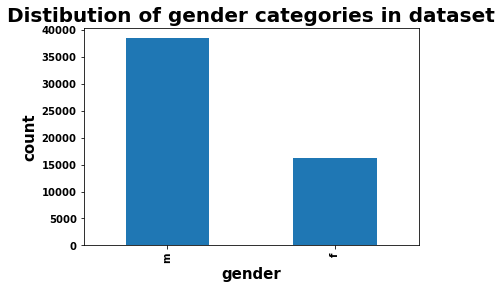

In [31]:
dataset['gender'].value_counts().plot(kind='bar')
plt.title('Distibution of gender categories in dataset',fontweight='bold',fontsize = 20)
plt.xlabel('gender',fontweight='bold',fontsize = 15)
plt.ylabel('count',fontweight='bold',fontsize = 15)
plt.xticks(fontweight="bold",fontsize = 10)
plt.yticks(fontweight="bold",fontsize = 10)
plt.show()

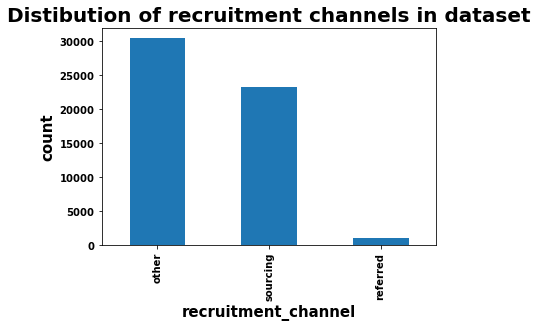

In [32]:
dataset['recruitment_channel'].value_counts().plot(kind='bar')
plt.title('Distibution of recruitment channels in dataset',fontweight='bold',fontsize = 20)
plt.xlabel('recruitment_channel',fontweight='bold',fontsize = 15)
plt.ylabel('count',fontweight='bold',fontsize = 15)
plt.xticks(fontweight="bold",fontsize = 10)
plt.yticks(fontweight="bold",fontsize = 10)
plt.show()

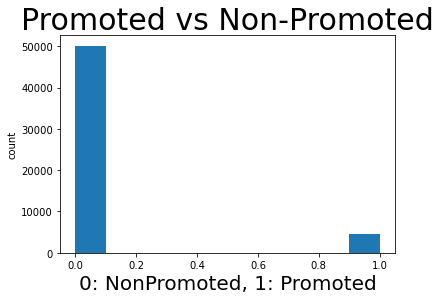

In [33]:
plt.hist(dataset['is_promoted'])
plt.title('Promoted vs Non-Promoted', fontsize = 30)
plt.xlabel('0: NonPromoted, 1: Promoted', fontsize = 20)
plt.ylabel('count')
plt.show()

There is a clear imbalancing problem in the target column between the two classes

Need to be solved using SMOTE in the preprocessing step

### Multi-Variate

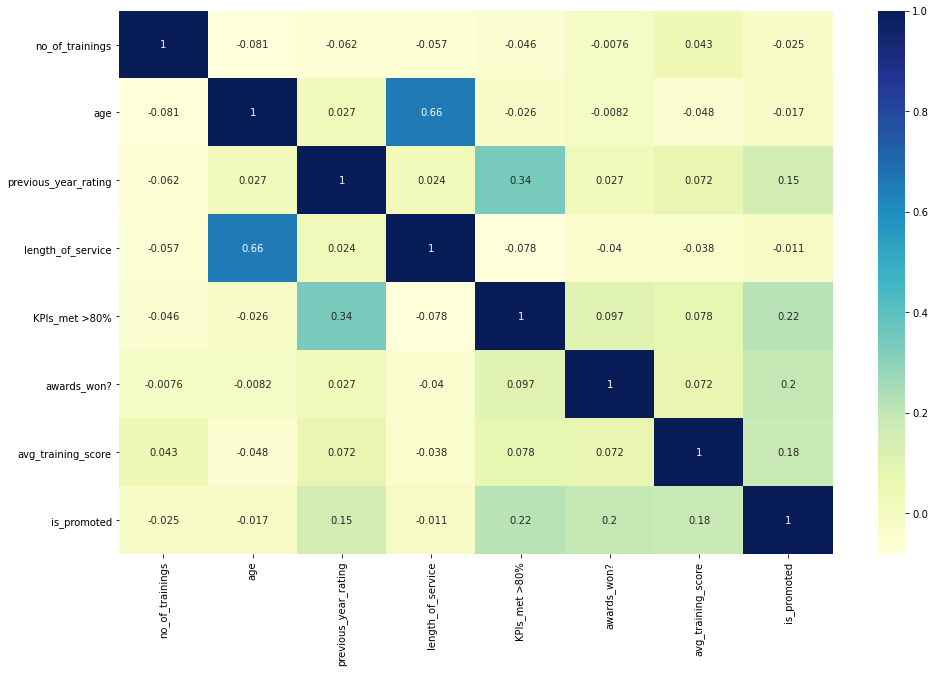

In [34]:
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Each variable has correlation = 1 with itself as expected

- There is high correlation between age and length_of_service as expected as older employees are more likely to have been
working in the company for longer time

- KPIs_met>80% is somehow related to previous year rating as expected as high rated employees are more likely to have their
KPIs met the condition

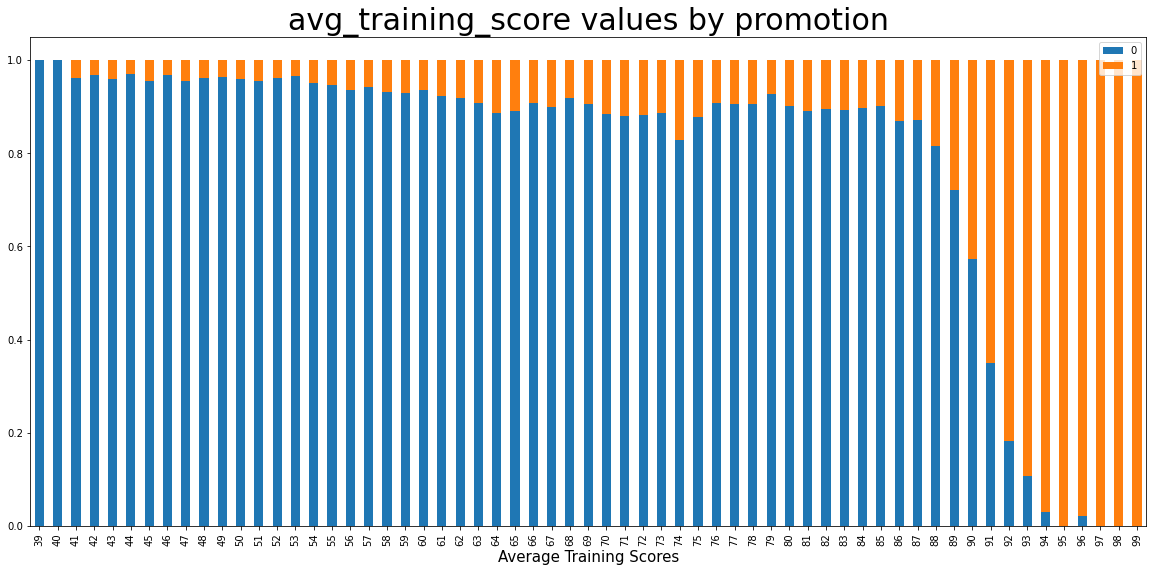

In [35]:
data = pd.crosstab(dataset['avg_training_score'], dataset['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9))

plt.title('avg_training_score values by promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

It's clear that the higher the avg_training_score, the more likely the employee is to be promoted

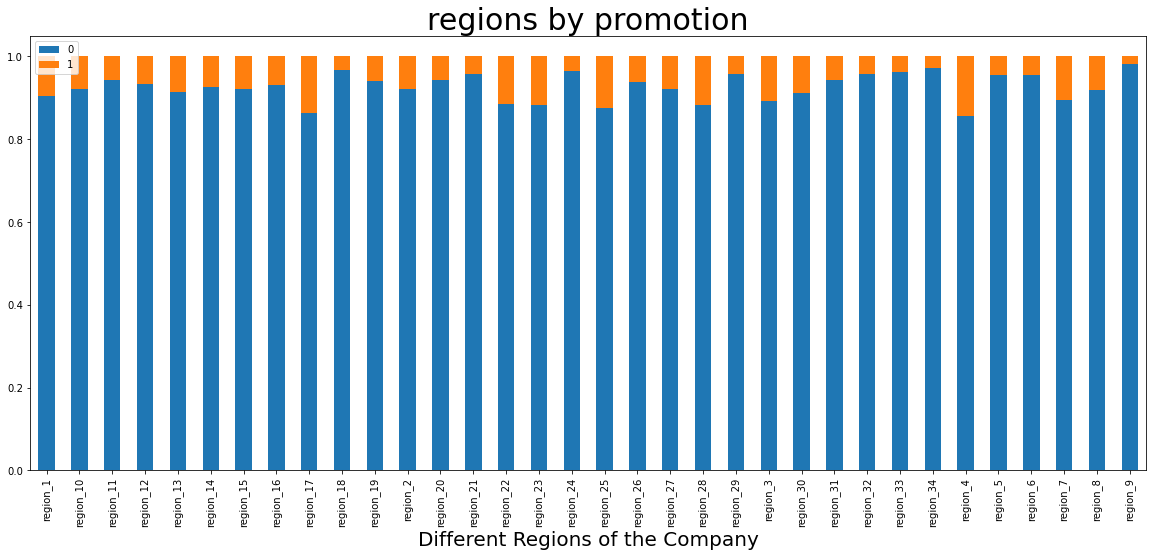

In [36]:
data = pd.crosstab(dataset['region'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('regions by promotion', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

The above graph shows that there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally

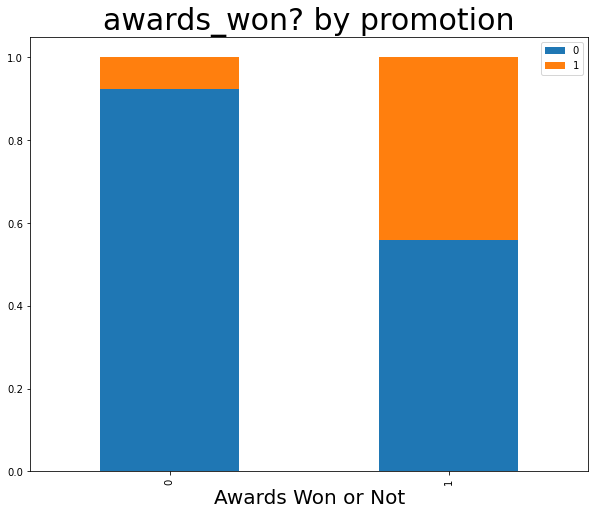

In [37]:
data = pd.crosstab(dataset['awards_won?'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('awards_won? by promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

It's clear that the more awards the employee have, the more likely he/she is to be promoted

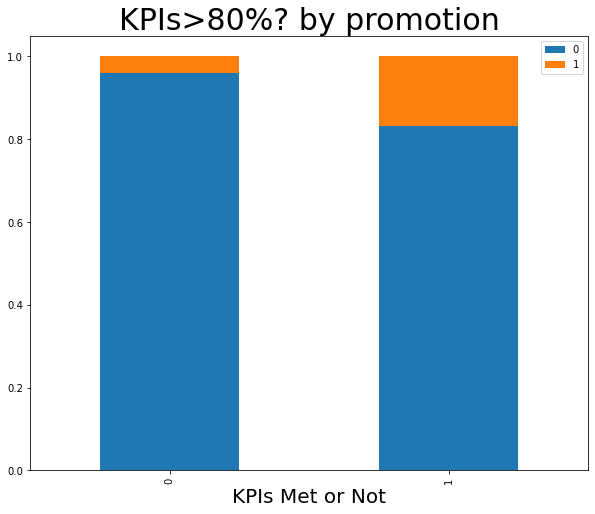

In [38]:
data = pd.crosstab(dataset['KPIs_met >80%'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8))

plt.title('KPIs>80%? by promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()

It's clear that the more KPIs the employee have, the more likely he/she is to be promoted

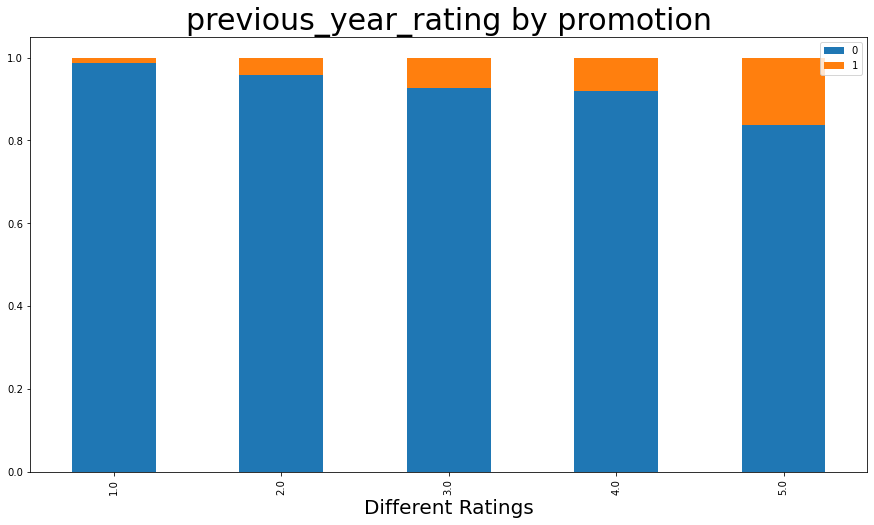

In [39]:
data = pd.crosstab(dataset['previous_year_rating'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8))

plt.title('previous_year_rating by promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

It's clear that the higher the rating of the employee, the more likely he/she is to be promoted

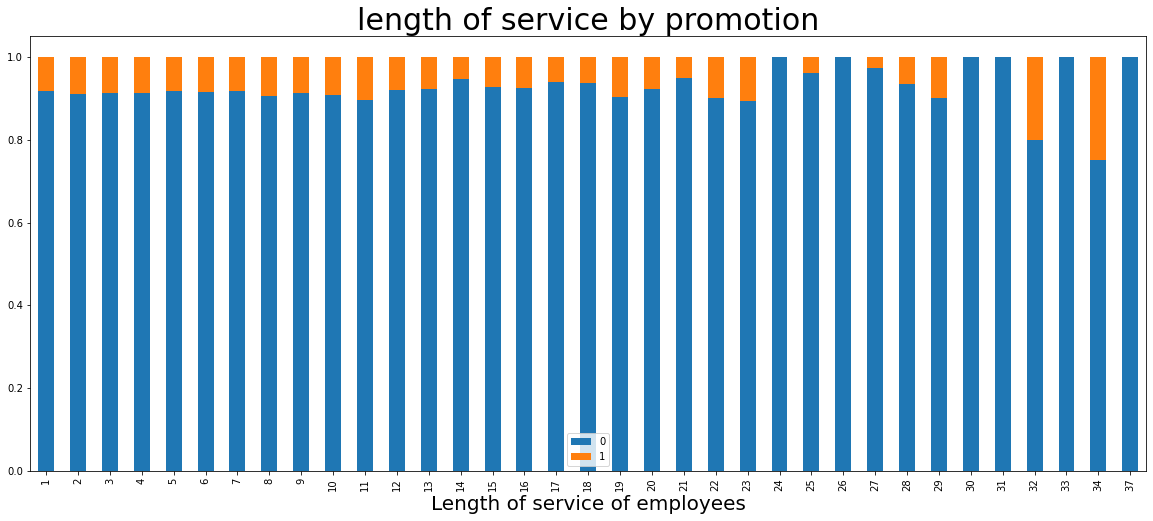

In [40]:
data = pd.crosstab(dataset['length_of_service'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('length of service by promotion', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()

Overall, we don't see a pttern in the length of service to determine the promotion of the employee


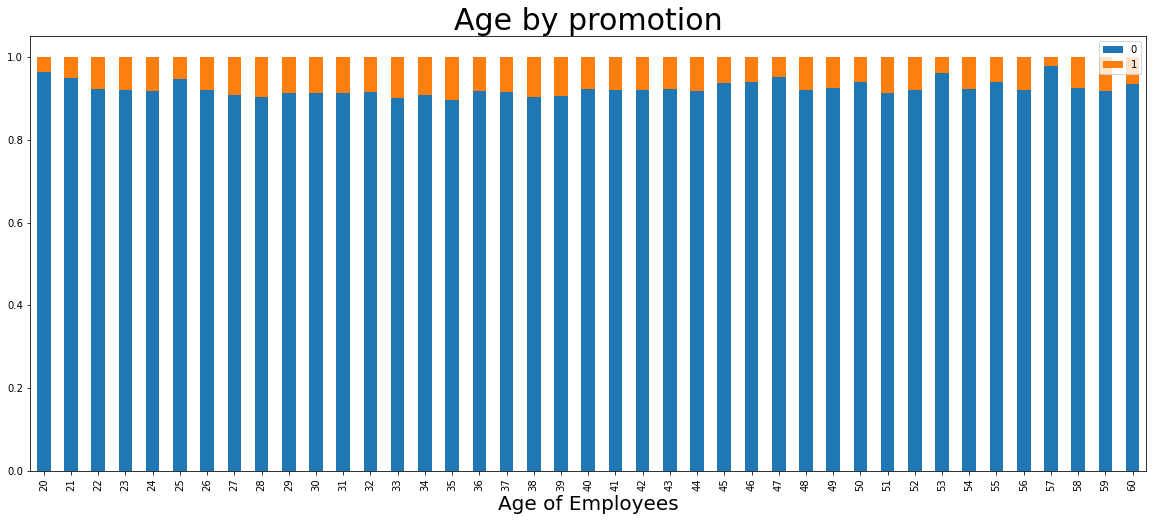

In [41]:
data = pd.crosstab(dataset['age'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('Age by promotion', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

Overall, i don't see a pttern in the age to determine the promotion of the employee.

And this shows that the company promotes employees of all ages equally, even the freshers have equal share of promotion


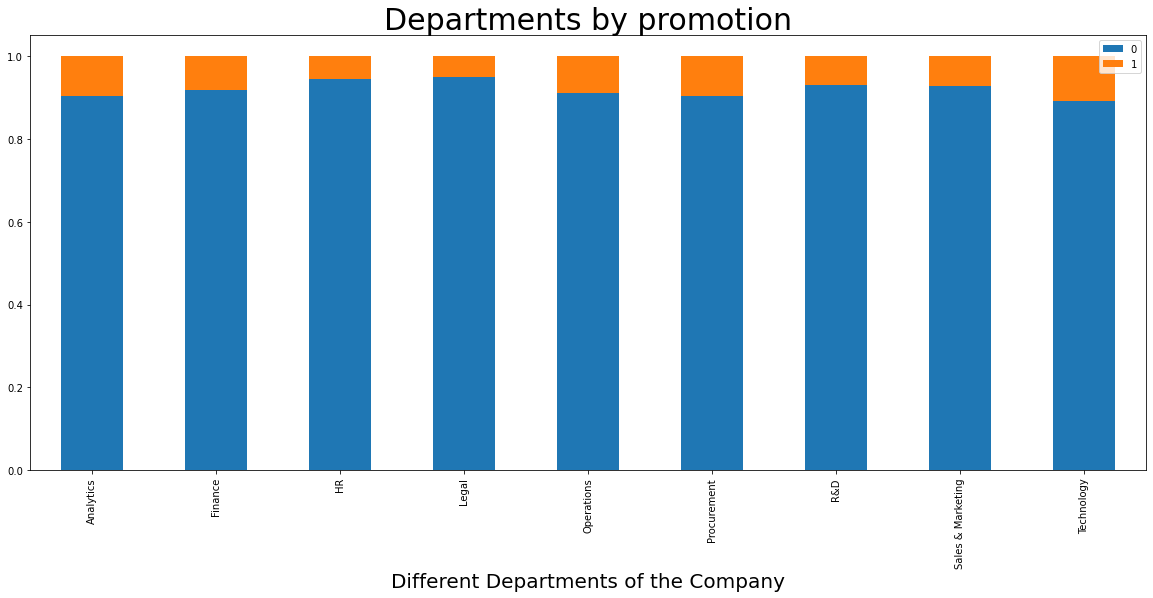

In [42]:
data = pd.crosstab(dataset['department'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8))

plt.title('Departments by promotion', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

It's clear that the department has no pattern to determine the promotion of the employee, 
so, we can safely say that Departments have a similar effect on the promotion.

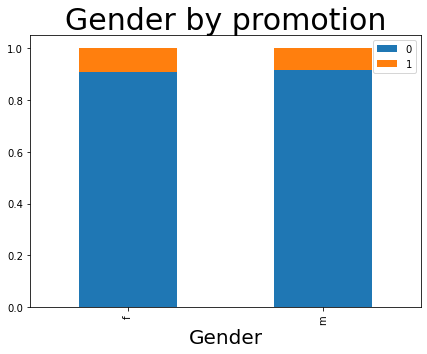

In [43]:
data = pd.crosstab(dataset['gender'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('Gender by promotion', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

- The gender doesn't affect how likely the employee is to be promoted
- Yes females are minority in the company, but When it comes to promotion, they are competing with their men counterparts neck-to-neck.

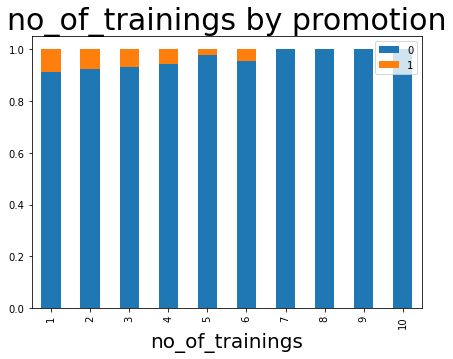

In [44]:
data = pd.crosstab(dataset['no_of_trainings'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('no_of_trainings by promotion', fontsize = 30)
plt.xlabel('no_of_trainings', fontsize = 20)
plt.legend()
plt.show()

It's clear that the less trainings the employee have, the more likely he/she is to be promoted

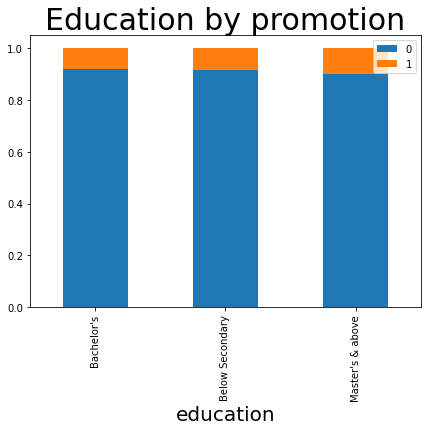

In [45]:
data = pd.crosstab(dataset['education'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('Education by promotion', fontsize = 30)
plt.xlabel('education', fontsize = 20)
plt.legend()
plt.show()

It's clear that Education doesn't affect how likely the employee is to be promoted

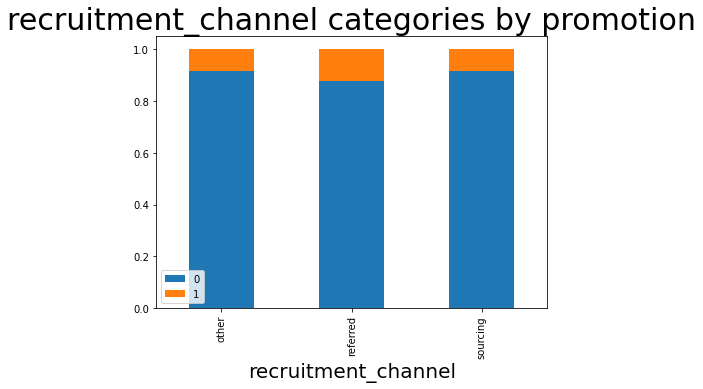

In [46]:
data = pd.crosstab(dataset['recruitment_channel'], dataset['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5))

plt.title('recruitment_channel categories by promotion', fontsize = 30)
plt.xlabel('recruitment_channel', fontsize = 20)
plt.legend()
plt.show()

It's clear that recruitment_channel doesn't affect how likely the employee is to be promoted

# Descriptive Analysis: Association Rule Mining

Done in another notebook to minimize the length of this one

# Feature Selection

From data analysis and using the Forward Selection Method, we will train on the following features:
- department
- region
- recruitment_channel
- age
- length_of_service
- no_of_trainings
- previous_year_rating
- KPIs_met >80% 
- awards_won?
- avg_training_score

And drop the following features:
- education
- gender

In [47]:
dataset= dataset.drop(['education'], axis = 1)
dataset= dataset.drop(['gender'],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   recruitment_channel   54808 non-null  object 
 3   no_of_trainings       54808 non-null  int64  
 4   age                   54808 non-null  int64  
 5   previous_year_rating  54808 non-null  float64
 6   length_of_service     54808 non-null  int64  
 7   KPIs_met >80%         54808 non-null  int64  
 8   awards_won?           54808 non-null  int64  
 9   avg_training_score    54808 non-null  int64  
 10  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 4.6+ MB


# Preprocessing

### Handling Categorical data

In [48]:
#split data into features and target
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(X.shape)
print(y.shape)

(54808, 10)
(54808,)


In [50]:
#performing one hot encoding on the categorical variables
X = pd.get_dummies(X)
X.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

### Handling Imbalanced class

In [51]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y.values.ravel())

X = pd.DataFrame(X)
y = pd.DataFrame(y)

print( X.shape)
print( y.shape)

(100280, 53)
(100280, 1)


In [52]:
y[0].value_counts()
#Now the problem of imbalancing is solved

1    50140
0    50140
Name: 0, dtype: int64

### Splitting the data set into train_validate and test

In [53]:
#concatenate X and Y
dataset_v2 = pd.concat([X,y], axis=1)
dataset_v2.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,0
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
dataset_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100280 entries, 0 to 100279
Data columns (total 54 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   no_of_trainings               100280 non-null  int64  
 1   age                           100280 non-null  int64  
 2   previous_year_rating          100280 non-null  float64
 3   length_of_service             100280 non-null  int64  
 4   KPIs_met >80%                 100280 non-null  int64  
 5   awards_won?                   100280 non-null  int64  
 6   avg_training_score            100280 non-null  int64  
 7   department_Analytics          100280 non-null  uint8  
 8   department_Finance            100280 non-null  uint8  
 9   department_HR                 100280 non-null  uint8  
 10  department_Legal              100280 non-null  uint8  
 11  department_Operations         100280 non-null  uint8  
 12  department_Procurement        100280 non-nul

In [56]:
dataset_v2.rename(columns = {0:'is_promoted'}, inplace = True)


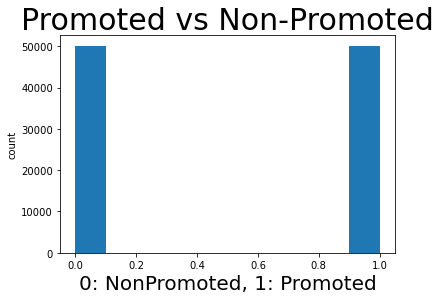

In [59]:
plt.hist(dataset_v2['is_promoted'])
plt.title('Promoted vs Non-Promoted', fontsize = 30)
plt.xlabel('0: NonPromoted, 1: Promoted', fontsize = 20)
plt.ylabel('count')
plt.show()

In [66]:
dataset_v2.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
dataset_train, dataset_test = train_test_split(dataset_v2, test_size = 0.2, random_state = 0)

### Data Normalization

In [68]:
#of the train data
for column in dataset_train.columns:
    dataset_train[column] = (dataset_train[column] - dataset_train[column].min()) / (dataset_train[column].max() - dataset_train[column].min())    

<ipython-input-68-2e4cf0d5e506>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train[column] = (dataset_train[column] - dataset_train[column].min()) / (dataset_train[column].max() - dataset_train[column].min())
<ipython-input-68-2e4cf0d5e506>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train[column] = (dataset_train[column] - dataset_train[column].min()) / (dataset_train[column].max() - dataset_train[column].min())
<ipython-input-68-2e4cf0d5e506>:3: SettingWithCopyWarning: 
A value is

In [69]:
#of the test data
for column in dataset_test.columns:
    dataset_test[column] = (dataset_test[column] - dataset_test[column].min()) / (dataset_test[column].max() - dataset_test[column].min())    

<ipython-input-69-b63abb24013f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test[column] = (dataset_test[column] - dataset_test[column].min()) / (dataset_test[column].max() - dataset_test[column].min())
<ipython-input-69-b63abb24013f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test[column] = (dataset_test[column] - dataset_test[column].min()) / (dataset_test[column].max() - dataset_test[column].min())
<ipython-input-69-b63abb24013f>:3: SettingWithCopyWarning: 
A value is trying to

### Splitting the train into train and validate

In [70]:
dataset_train_v2, dataset_validation = train_test_split(dataset_train, test_size = 0.2, random_state = 0)

### preparing the features and the target


In [71]:
X_train = dataset_train_v2.drop(['is_promoted'],axis=1)
y_train = dataset_train_v2['is_promoted']

X_train.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
80653,0.0,0.375,1.0,0.166667,0.0,0.0,0.800000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
63614,0.0,0.275,0.5,0.055556,1.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
X_valid = dataset_validation.drop(['is_promoted'],axis=1)
y_valid = dataset_validation['is_promoted']

X_valid.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
85789,0.111111,0.300,0.5,0.083333,1.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29791,0.000000,0.375,0.5,0.250000,0.0,0.0,0.133333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
X_test = dataset_test.drop(['is_promoted'],axis=1)
y_test = dataset_test['is_promoted']

X_test.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
92988,0.0,0.6,1.0,0.151515,0.0,0.0,0.881356,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77138,0.0,0.4,1.0,0.090909,0.0,0.0,0.474576,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Training Models

## SVM

Training

In [75]:
SVM = SVC().fit(X_train, y_train)

Training set evaluation

In [76]:
y_train_pred_svm = SVM.predict(X_train)
#evaluating on validation set
print(confusion_matrix(y_train, y_train_pred_svm))
print(classification_report(y_train, y_train_pred_svm))
print(accuracy_score(y_train, y_train_pred_svm))

[[31916   197]
 [ 3984 28082]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     32113
         1.0       0.99      0.88      0.93     32066

    accuracy                           0.93     64179
   macro avg       0.94      0.93      0.93     64179
weighted avg       0.94      0.93      0.93     64179

0.9348540799950139


Validation set evaluation

In [77]:
y_val_pred_svm = SVM.predict(X_valid)
#evaluating on validation set
print(confusion_matrix(y_valid, y_val_pred_svm))
print(classification_report(y_valid, y_val_pred_svm))
print(accuracy_score(y_valid, y_val_pred_svm))

[[7988   58]
 [ 969 7030]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      8046
         1.0       0.99      0.88      0.93      7999

    accuracy                           0.94     16045
   macro avg       0.94      0.94      0.94     16045
weighted avg       0.94      0.94      0.94     16045

0.9359925210345902


Test set evaluation

In [78]:
y_tst_pred_svm = SVM.predict(X_test)
#evaluating on validation set
print(confusion_matrix(y_test, y_tst_pred_svm))
print(classification_report(y_test, y_tst_pred_svm))
print(accuracy_score(y_test, y_tst_pred_svm))

[[9902   79]
 [1224 8851]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      9981
         1.0       0.99      0.88      0.93     10075

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.93     20056
weighted avg       0.94      0.94      0.93     20056

0.9350319106501795


## KNN

Training

In [79]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

Train set evaluation

In [81]:
y_train_pred_knn = KNN.predict(X_train)
print(confusion_matrix(y_train, y_train_pred_knn))
print(classification_report(y_train, y_train_pred_knn))
print(accuracy_score(y_train, y_train_pred_knn))

[[31003  1110]
 [ 1906 30160]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     32113
         1.0       0.96      0.94      0.95     32066

    accuracy                           0.95     64179
   macro avg       0.95      0.95      0.95     64179
weighted avg       0.95      0.95      0.95     64179

0.9530064351267549


Validation set evaluation

In [82]:
y_val_pred_knn = KNN.predict(X_valid)
print(confusion_matrix(y_valid, y_val_pred_knn))
print(classification_report(y_valid, y_val_pred_knn))
print(accuracy_score(y_valid, y_val_pred_knn))

[[7605  441]
 [ 567 7432]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      8046
         1.0       0.94      0.93      0.94      7999

    accuracy                           0.94     16045
   macro avg       0.94      0.94      0.94     16045
weighted avg       0.94      0.94      0.94     16045

0.9371766905578062


Test set evaluation

In [83]:
y_tst_pred_knn = KNN.predict(X_test)
print(confusion_matrix(y_test, y_tst_pred_knn))
print(classification_report(y_test, y_tst_pred_knn))
print(accuracy_score(y_test, y_tst_pred_knn))

[[9408  573]
 [ 758 9317]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      9981
         1.0       0.94      0.92      0.93     10075

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056

0.9336358197048265


## Naive Bayes

Training

In [84]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(X_train, y_train)

Train set evaluation

In [85]:
y_train_pred_nb = NB.predict(X_train)

print(confusion_matrix(y_train, y_train_pred_nb))
print(classification_report(y_train, y_train_pred_nb))
print(accuracy_score(y_train, y_train_pred_nb))

[[18524 13589]
 [ 2712 29354]]
              precision    recall  f1-score   support

         0.0       0.87      0.58      0.69     32113
         1.0       0.68      0.92      0.78     32066

    accuracy                           0.75     64179
   macro avg       0.78      0.75      0.74     64179
weighted avg       0.78      0.75      0.74     64179

0.7460072609420527


Validation set evaluation

In [86]:
y_val_pred_nb = NB.predict(X_valid)

print(confusion_matrix(y_valid, y_val_pred_nb))
print(classification_report(y_valid, y_val_pred_nb))
print(accuracy_score(y_valid, y_val_pred_nb))

[[4601 3445]
 [ 651 7348]]
              precision    recall  f1-score   support

         0.0       0.88      0.57      0.69      8046
         1.0       0.68      0.92      0.78      7999

    accuracy                           0.74     16045
   macro avg       0.78      0.75      0.74     16045
weighted avg       0.78      0.74      0.74     16045

0.7447179806793394


Test set evaluation

In [88]:
y_tst_pred_nb = NB.predict(X_test)

print(confusion_matrix(y_test, y_tst_pred_nb))
print(classification_report(y_test, y_tst_pred_nb))
print(accuracy_score(y_test, y_tst_pred_nb))

[[5806 4175]
 [ 821 9254]]
              precision    recall  f1-score   support

         0.0       0.88      0.58      0.70      9981
         1.0       0.69      0.92      0.79     10075

    accuracy                           0.75     20056
   macro avg       0.78      0.75      0.74     20056
weighted avg       0.78      0.75      0.74     20056

0.7508974870362983


## Logistic Regression

Training

In [89]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train, y_train)

e:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train set evaluation

In [91]:
y_train_pred_lr = LR.predict(X_train)

print(confusion_matrix(y_train, y_train_pred_lr))
print(classification_report(y_train, y_train_pred_lr))
print(accuracy_score(y_train, y_train_pred_lr))

[[31259   854]
 [ 4071 27995]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93     32113
         1.0       0.97      0.87      0.92     32066

    accuracy                           0.92     64179
   macro avg       0.93      0.92      0.92     64179
weighted avg       0.93      0.92      0.92     64179

0.923261502983842


validation set evaluation

In [92]:
y_val_pred_lr = LR.predict(X_valid)

print(confusion_matrix(y_valid, y_val_pred_lr))
print(classification_report(y_valid, y_val_pred_lr))
print(accuracy_score(y_valid, y_val_pred_lr))

[[7816  230]
 [ 965 7034]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      8046
         1.0       0.97      0.88      0.92      7999

    accuracy                           0.93     16045
   macro avg       0.93      0.93      0.93     16045
weighted avg       0.93      0.93      0.93     16045

0.9255219694608913


Test set evaluation

In [93]:
y_tst_pred_lr = LR.predict(X_test)

print(confusion_matrix(y_test, y_tst_pred_lr))
print(classification_report(y_test, y_tst_pred_lr))
print(accuracy_score(y_test, y_tst_pred_lr))

[[9758  223]
 [1255 8820]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      9981
         1.0       0.98      0.88      0.92     10075

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056

0.9263063422417231


## Decision Trees

Training

In [94]:
#trying decision tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = DT.predict(X_valid)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_valid, y_pred_dt))
print(classification_report(y_valid, y_pred_dt))
print(accuracy_score(y_valid, y_pred_dt))

Train set evaluation

In [95]:
y_train_pred_dt = DT.predict(X_train)

print(confusion_matrix(y_train, y_train_pred_dt))
print(classification_report(y_train, y_train_pred_dt))
print(accuracy_score(y_train, y_train_pred_dt))

[[32104     9]
 [   16 32050]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     32113
         1.0       1.00      1.00      1.00     32066

    accuracy                           1.00     64179
   macro avg       1.00      1.00      1.00     64179
weighted avg       1.00      1.00      1.00     64179

0.9996104644821515


Validation set evaluation

In [96]:
y_val_pred_dt = DT.predict(X_valid)

print(confusion_matrix(y_valid, y_val_pred_dt))
print(classification_report(y_valid, y_val_pred_dt))
print(accuracy_score(y_valid, y_val_pred_dt))

[[7439  607]
 [ 395 7604]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      8046
         1.0       0.93      0.95      0.94      7999

    accuracy                           0.94     16045
   macro avg       0.94      0.94      0.94     16045
weighted avg       0.94      0.94      0.94     16045

0.9375506388282954


## There is a clear overfitting in the decision tree classifier

Test set evaluation

In [97]:
y_tst_pred_dt = DT.predict(X_test)

print(confusion_matrix(y_test, y_tst_pred_dt))
print(classification_report(y_test, y_tst_pred_dt))
print(accuracy_score(y_test, y_tst_pred_dt))

[[9228  753]
 [ 602 9473]]
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      9981
         1.0       0.93      0.94      0.93     10075

    accuracy                           0.93     20056
   macro avg       0.93      0.93      0.93     20056
weighted avg       0.93      0.93      0.93     20056

0.9324391703230953


## Random Forests (The Final Solution to the Problem)

Training

In [103]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred_rf = RF.predict(X_valid)

#evaluating
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_valid, y_pred_rf))
print(classification_report(y_valid, y_pred_rf))
print(accuracy_score(y_valid, y_pred_rf))

Train set evluation

In [104]:
y_train_pred_rf = RF.predict(X_train)

print(confusion_matrix(y_train, y_train_pred_rf))
print(classification_report(y_train, y_train_pred_rf))
print(accuracy_score(y_train, y_train_pred_rf))

[[32098    15]
 [   10 32056]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     32113
         1.0       1.00      1.00      1.00     32066

    accuracy                           1.00     64179
   macro avg       1.00      1.00      1.00     64179
weighted avg       1.00      1.00      1.00     64179

0.9996104644821515


Validation set evaluation

In [105]:
y_val_pred_rf = RF.predict(X_valid)

print(confusion_matrix(y_valid, y_val_pred_rf))
print(classification_report(y_valid, y_val_pred_rf))
print(accuracy_score(y_valid, y_val_pred_rf))

[[7832  214]
 [ 394 7605]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      8046
         1.0       0.97      0.95      0.96      7999

    accuracy                           0.96     16045
   macro avg       0.96      0.96      0.96     16045
weighted avg       0.96      0.96      0.96     16045

0.9621065752570894


Test set evaluation

In [106]:
y_test_pred_rf = RF.predict(X_test)

print(confusion_matrix(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))
print(accuracy_score(y_test, y_test_pred_rf))

[[9685  296]
 [ 543 9532]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      9981
         1.0       0.97      0.95      0.96     10075

    accuracy                           0.96     20056
   macro avg       0.96      0.96      0.96     20056
weighted avg       0.96      0.96      0.96     20056

0.9581671320303151
